In [19]:
# SET THE OUTPUT FORMAT
import pandas as pd
import matplotlib
import logging, sys
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_colwidth', None)

logging.basicConfig(encoding='utf-8', level=logging.INFO)

print('Python version is ' + sys.version )
print('Pandas version is ' + pd.__version__ )
print('Matplotlib version is ' + matplotlib.__version__ )

ModuleNotFoundError: No module named 'pandas'

In [ ]:
mydati = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [ ]:
mydati.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# controlla la forma dei dati
mydati.shape

(30000, 25)

In [ ]:
mydati.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Vedi se gli ID hanno duplicati (spoiler: ne hanno )
mydati['ID'].nunique()

29687

In [ ]:
# Visualizza un esempio dei duplicati
id_counts = mydati['ID'].value_counts(normalize=False)
id_counts.head()

ID
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
75938fec-e5ec    2
2a793ecf-05c6    2
Name: count, dtype: int64

In [ ]:
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [ ]:
dupe_mask = id_counts == 2

In [ ]:
dupe_mask[:5]

ID
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
75938fec-e5ec    True
2a793ecf-05c6    True
Name: count, dtype: bool

In [ ]:
dupe_ids = id_counts.index[dupe_mask]

In [ ]:
dupe_ids = list(dupe_ids)

In [ ]:
len(dupe_ids)

313

In [ ]:
dupe_ids[0:5]

['89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9',
 '75938fec-e5ec',
 '2a793ecf-05c6']

In [ ]:
# Vediamo qualche esempio di record duplicato per vedere come si presentano
mydati.loc[ mydati['ID'].isin(dupe_ids[0:3]),:]#.sort_values(by=['ID'], ascending=True)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,0,0,160832,164750,168370,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,0,0,45343,31228,29756,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29646,90330d02-82d9,70000,1,2,1,29,0,0,0,0,0,0,78244,19275,11231,10694,27908,11192,2009,1404,3016,20001,2000,5002,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Abbiamo visto che i duplicati sono sostanzialmente record in cui tutte le colonne hanno valore 0:
# Adesso, creiamo una maschera che controlla se il valore di una cella e' 0
df_zero_mask = mydati == 0

In [ ]:
df_zero_mask
# ...sembra a posto

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Adesso, utilizzando la maschera cosi' creata, selezioniamo i record duplicati usando iloc e .all( all "Returns whether all elements are True, potentially over an axis.")
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [ ]:
sum(feature_zero_mask)

315

In [ ]:
df_clean_1 = mydati.loc[~feature_zero_mask,:].copy()

In [ ]:
df_clean_1.shape

(29685, 25)

In [ ]:
df_clean_1['ID'].nunique()

29685

In [ ]:
df_clean_1.to_csv('df_clean_1.csv', index=False)

In [ ]:
df_clean_1 = pd.read_csv('df_clean_1.csv')

In [ ]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [ ]:
df_clean_1['PAY_1'].head(10)

0     2
1    -1
2     0
3     0
4    -1
5     0
6     0
7     0
8     0
9    -2
Name: PAY_1, dtype: object

In [ ]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [ ]:
valid_pay1_mask = df_clean_1['PAY_1'] != "Not available"

In [ ]:
sum(valid_pay1_mask)

26664

In [ ]:
df_clean_2 = df_clean_1.loc[valid_pay1_mask,:].copy()

In [ ]:
df_clean_2.shape

(26664, 25)

In [ ]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [ ]:
df_clean_2[['ID','PAY_1','BILL_AMT3']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29684
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         26664 non-null  object
 1   PAY_1      26664 non-null  int64 
 2   BILL_AMT3  26664 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 833.2+ KB


In [ ]:
df_clean_2.to_csv('df_clean_2.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt #import plotting package

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 100 #high resolution figures

In [ ]:
df_clean_2 = pd.read_csv('df_clean_2.csv')

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

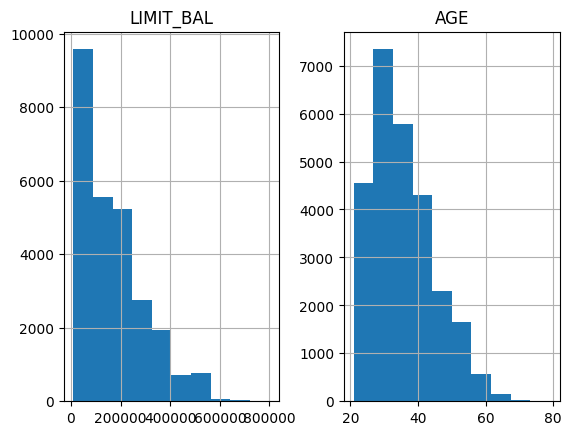

In [ ]:
# Diamo un'occhiata alla distribuzione dei valori di ETA' e CREDITO AMMESSO
df_clean_2[['LIMIT_BAL','AGE']].hist()

In [ ]:
# Uno sguardo ai limiti della distribuzione... no minorenni con credito, i 3/4 sotto i 41 anni; anche il limite credito sembra OK (positivo, in un range sensato)
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [ ]:
# Per le categorie, vediamo il conteggio dei possibili valori:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [ ]:
# tra i valori EDUCATION ci sono dei valori sconosciuti: il nostro business partner ci ha solo informato di 1 (master), 2 (uni), 3 (high school) e 4( altro, liv. inferiore)
# cosa sono, 5,6 e 0 ?? Dato che sono relativamente pochi, raggruppiamoli in "altro"
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [ ]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [ ]:
# Marriage ha pure un valore "ignoto": lo 0 non e' previsto. Dato che sono 4 gatti, lo aggrego a 3 ("altro")
df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

In [ ]:
df_clean_2.to_csv('df_clean_2_01.csv')

In [ ]:
df_clean_2 = pd.read_csv('df_clean_2_01.csv')

<Axes: xlabel='EDUCATION'>

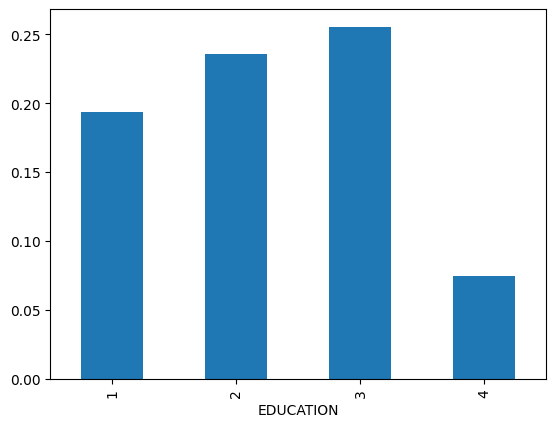

In [ ]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)

In [ ]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [ ]:
cat_mapping = {
    1 : "graduate school",
    2 : "university",
    3 : "high school",
    4 : "others"
    }
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

In [ ]:
df_clean_2.loc[:3]

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university


In [ ]:
edu_ohe = pd.get_dummies( df_clean_2['EDUCATION_CAT'])
edu_ohe.head(5)

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [ ]:
df_with_ohe = pd.concat( [df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head()

,EDUCATION_CAT,graduate school,high school,university,others
0,university,False,False,True,False
1,university,False,False,True,False
2,university,False,False,True,False
3,university,False,False,True,False
4,university,False,False,True,False


In [ ]:
df_with_ohe.to_csv('chapter_1_cleaned_data.csv', index=False)

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv('chapter_1_cleaned_data.csv')

In [ ]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [ ]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
df['PAY_1'].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

In [ ]:
pay_1_bins = np.array(range(-2,10)) - 0.5

Text(0, 0.5, 'Number of accounts')

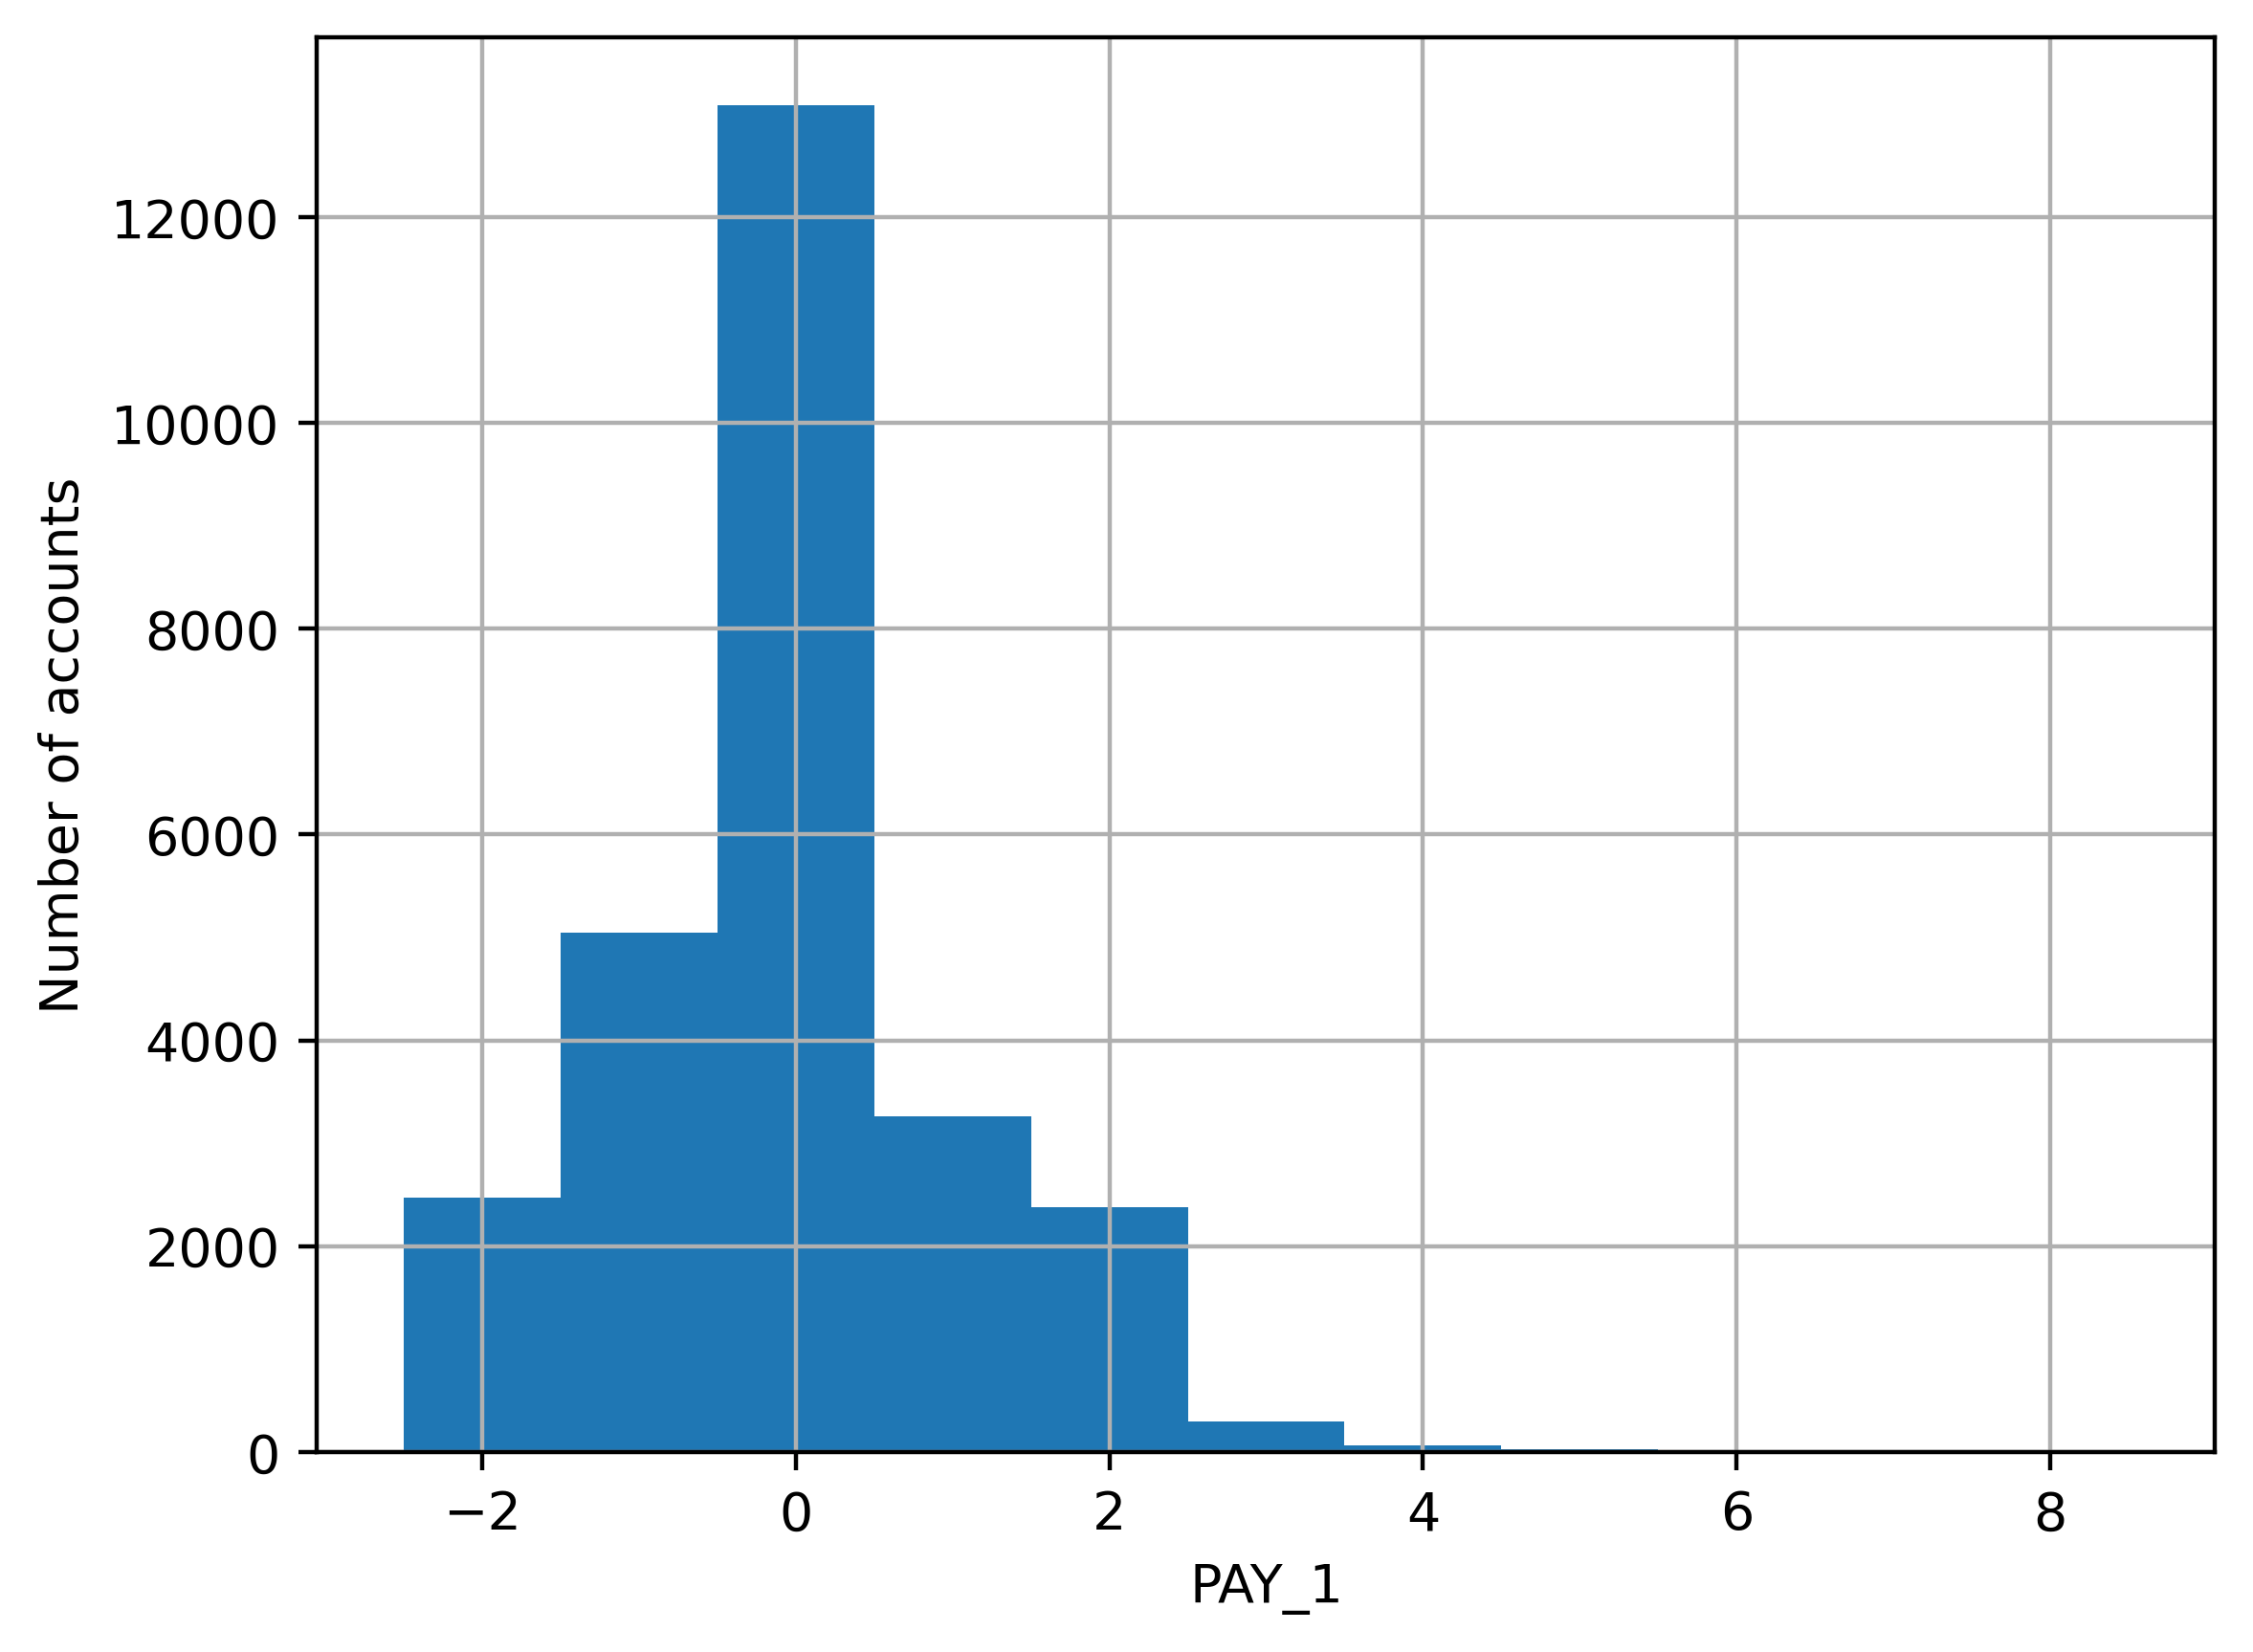

In [ ]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

In [ ]:
print(pay_1_bins)

[-2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


In [ ]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

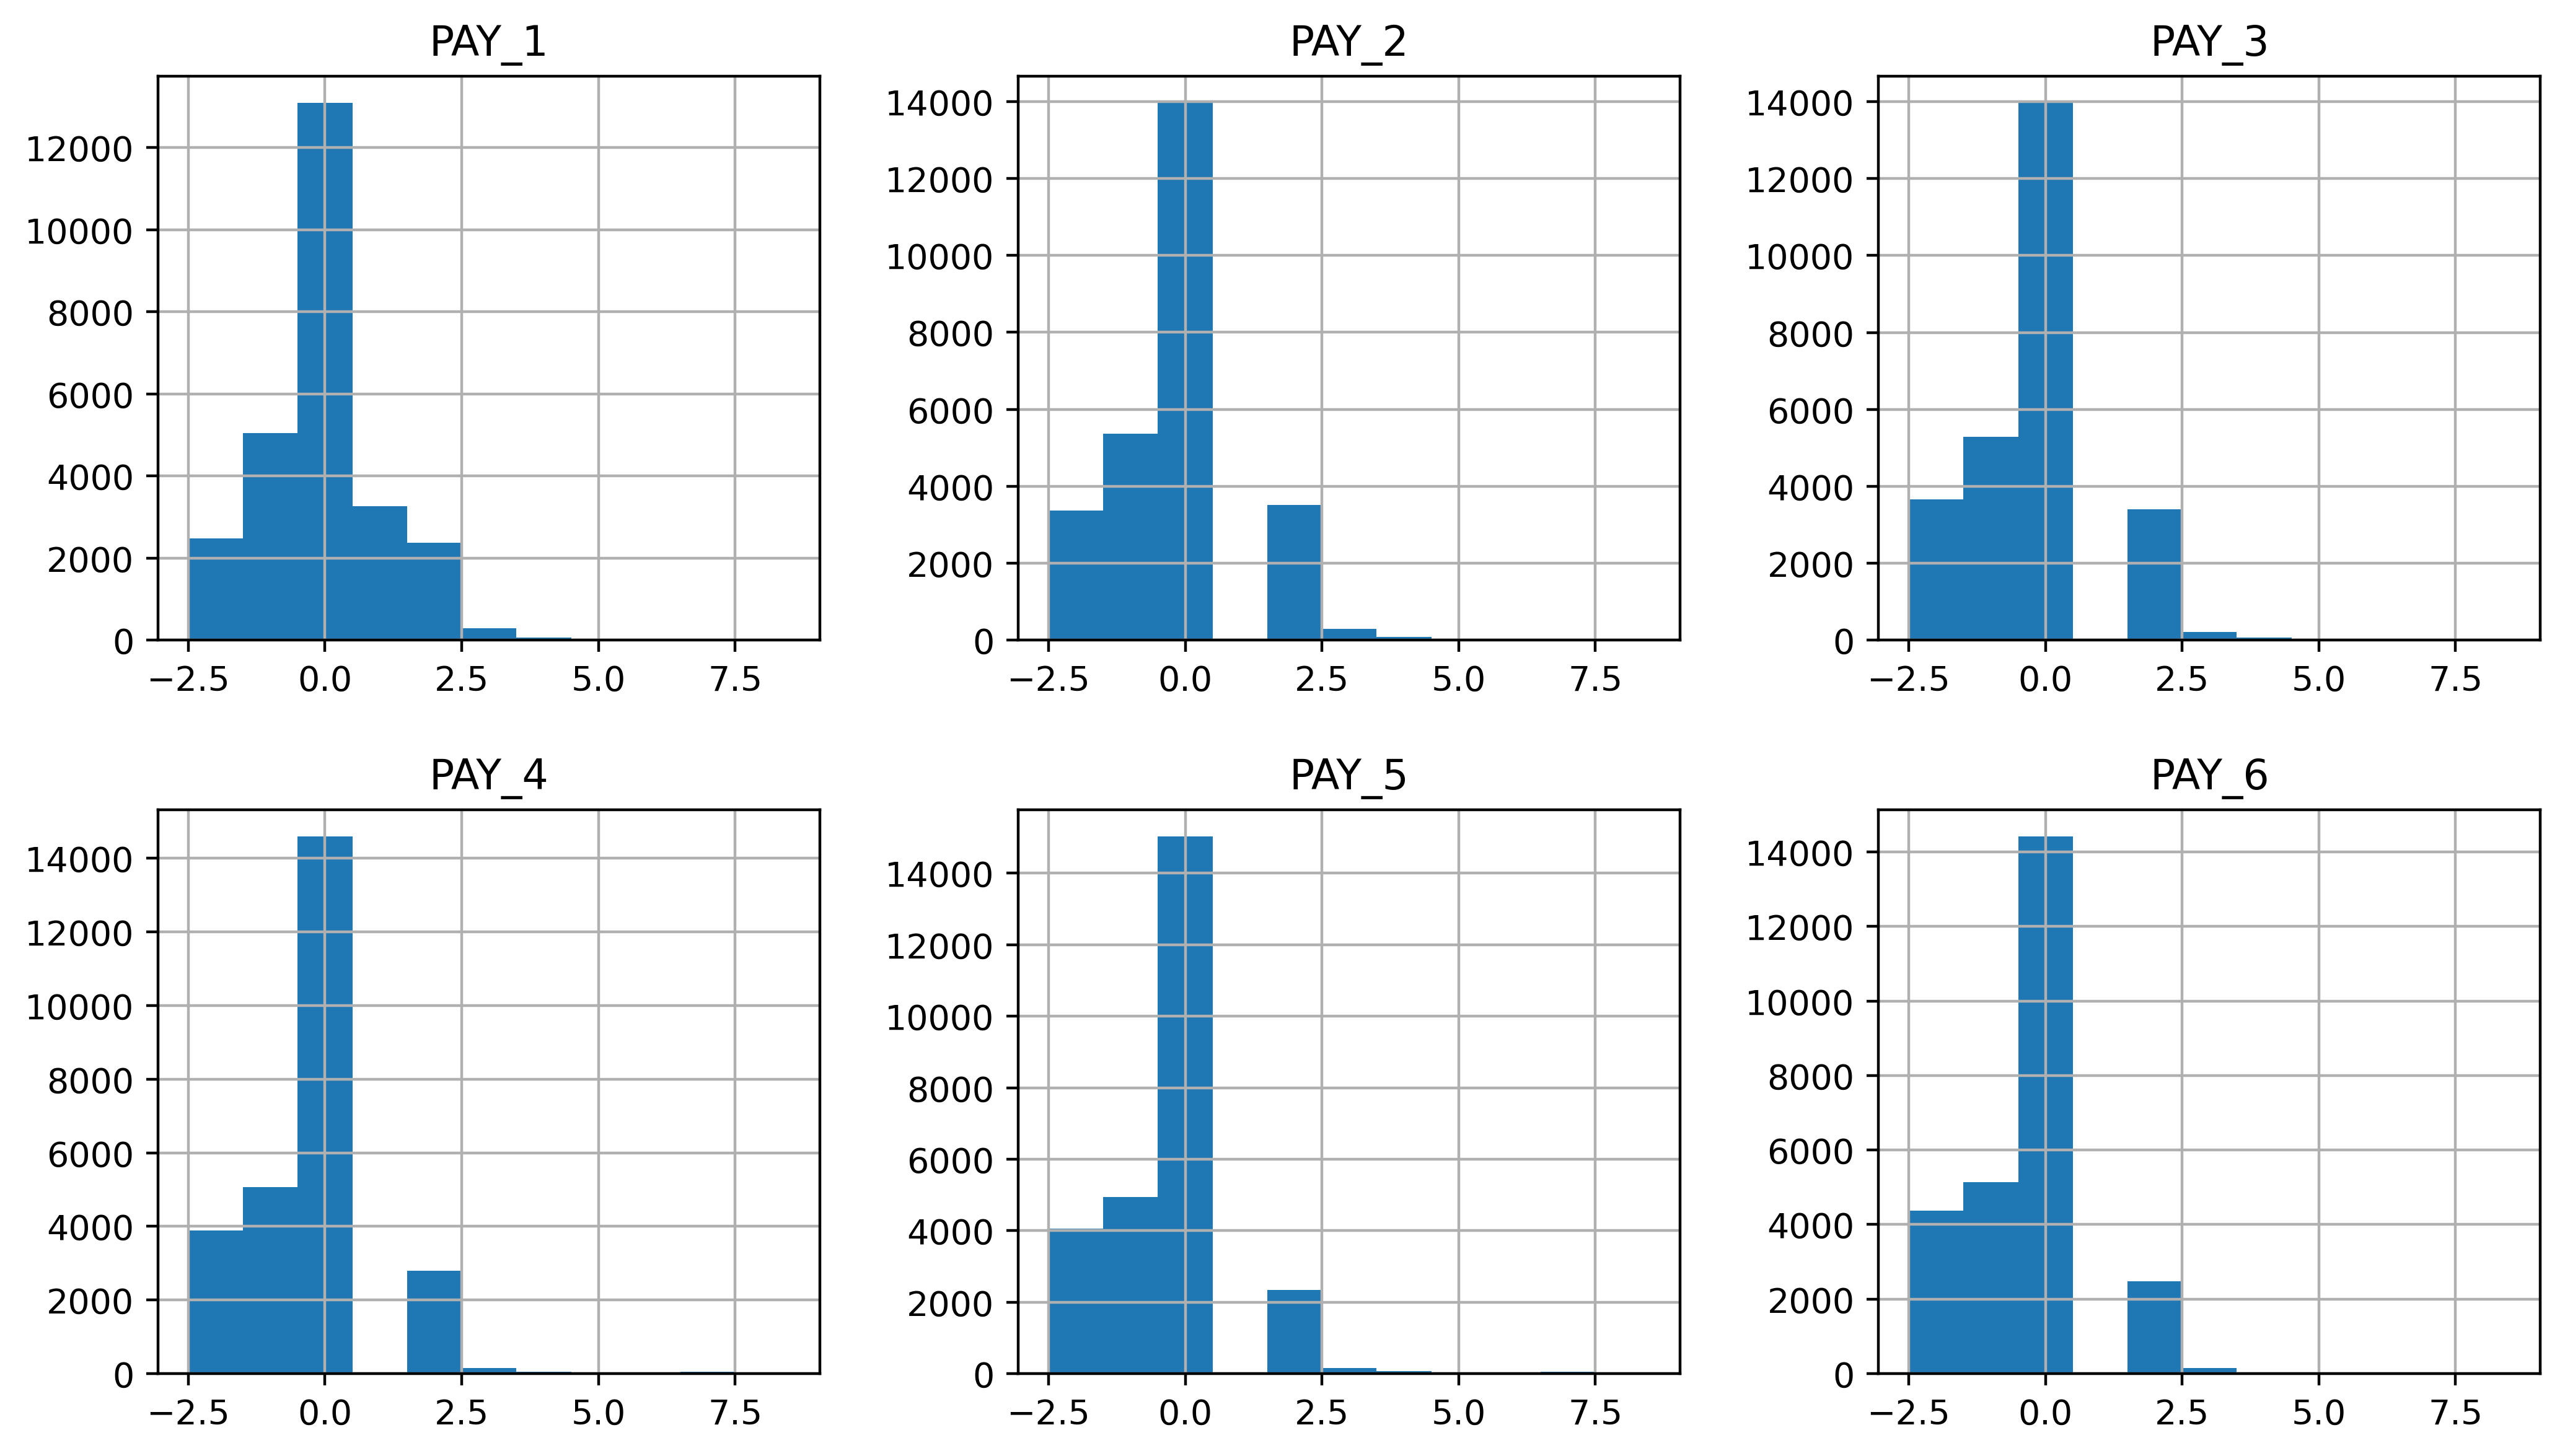

In [ ]:
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.figsize'] = [12.4, 6.8]

df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [ ]:
import numpy as np #numerical computation

import pandas as pd #data wrangling

import matplotlib.pyplot as plt #plotting package

#Next line helps with rendering plots

%matplotlib inline

import matplotlib as mpl #add'l plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high res figures

In [ ]:
df = pd.read_csv('./chapter_1_cleaned_data.csv')

In [ ]:
df['default payment next month'].mean()

0.2217971797179718

In [ ]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [ ]:
# Let's generate a model object for logistic regression using sklearn, and accepting the default settings (that means, not setting any parameter explicitly):
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [ ]:
# Now, let's try generating a new model object, but explicitly declaring all parameters with their default values:
my_new_lr = LogisticRegression(penalty='l2', dual=False,
                                tol=0.0001, C=1.0,\

                                fit_intercept=True,\

                                intercept_scaling=1,\

                                class_weight=None,\

                                random_state=None,\

                                solver='lbfgs',\

                                max_iter=100,\

                                multi_class='auto',\

                                verbose=0, warm_start=False,\

                                n_jobs=None, l1_ratio=None)

# We will now set a custom value for one of the hyperparameters, C:
my_new_lr.C = 0.1
# And specify a solver:
my_new_lr.solver = 'liblinear'

my_new_lr
# The new snippet below will only show the parameters that differ from the default

LogisticRegression(C=0.1, solver='liblinear')

To illustrate the core functionality, we will fit this nearly default logistic regression to some data. Supervised learning algorithms rely on labeled data. 

That means we need both the features, customarily contained in a variable called X (in our example this will be EDUCATION), and the corresponding responses, in a variable called y (in our test, "default payment next month").

In [ ]:
# Let's show the first 10 values of the selected feature
# we used the .reshape method to reshape the features. Scikit-learn expects that the first dimension (that is, the number of rows) of the array of features will be equal to the number of samples, so we need to make that reshaping for X
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [ ]:
# The corresponding first 10 values of the response variable can be obtained as follows:
Y = df['default payment next month'][0:10].values
Y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Let's now use this data to fit our logistic regression
my_new_lr.fit(X,Y)
# The my_new_lr model object is now a *trained* model. 
# this change happened in place since no new object was created; the existing object, my_new_lr, has been modified

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
# Let us now use the trained model to make predictions about the next 10 items in the dataset, getting the related EDUCATION values
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [ ]:
# Make prediction
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Let's see: what are the actual values for the variable?
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

#### Now, let's test the prediction capabilities with a test scenario: linear regression of a randomly generated data set

In [ ]:
# Random dataset -> will represent our feature
from numpy.random import default_rng
rg = default_rng(12345)

X = rg.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

In [ ]:
# Let's now generate a vector for our response variable Y, which are calculated as:
# Y = ax + b + N(μ, 𝝈)
# Here, a is the slope, b is the intercept, and the Gaussian noise has a mean of µ with a standard deviation of σ. 
# * the slope times the feature array, X, plus
# * some Gaussian noise (again using NumPy) -  array of 1,000 data points with the same shape (size) as the feature array, X, where the mean of the noise (loc) is 0 and the standard deviation (scale) is 1. This will add a little "spread" to our linear data
# * an intercept

slope = 0.25

intercept = -1.25

y = (slope * X) + intercept + rg.normal(loc=0.0, scale=1.0, size=(1000,))

Text(0, 0.5, 'Y')

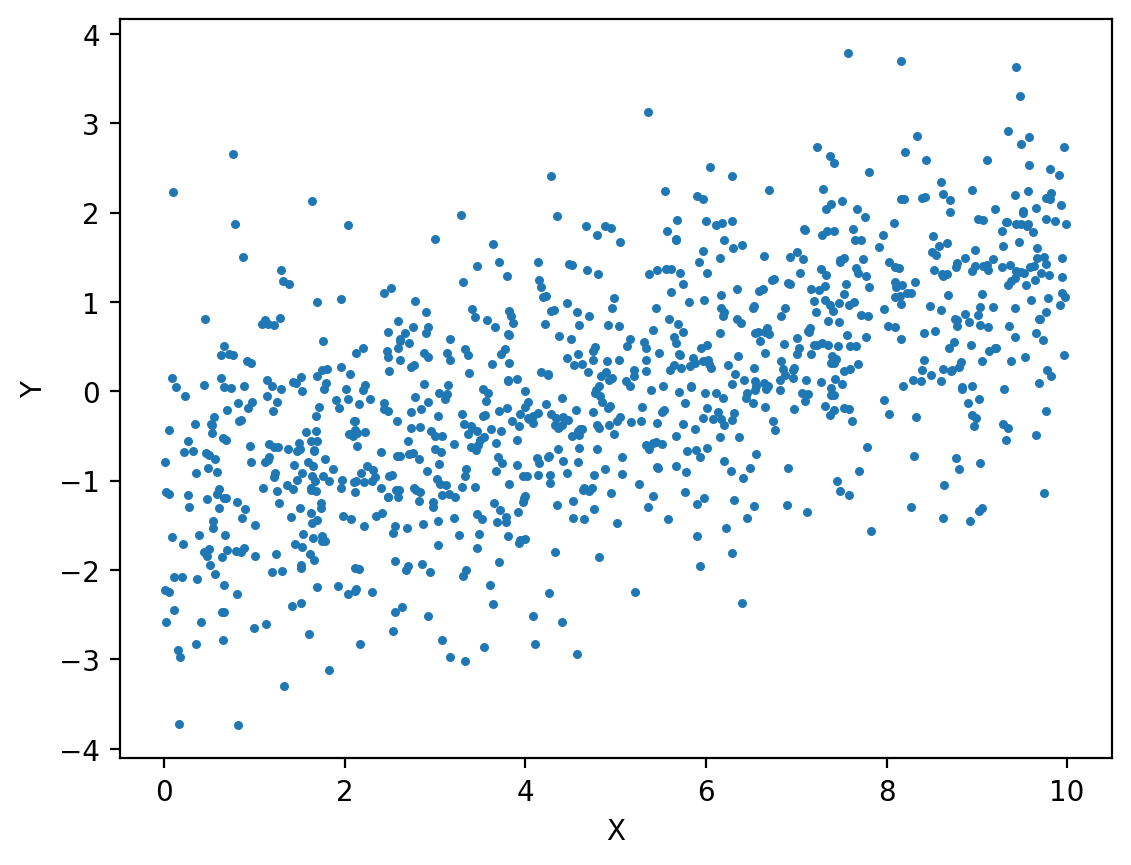

In [ ]:
# Let's now visualize the data:
mpl.rcParams['figure.dpi'] = 200
plt.scatter(X, y, s=5)
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
# Prepare for the linear regression: create the linear regression object
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True,copy_X=True, n_jobs=None)

lin_reg

LinearRegression()

In [ ]:
# Fit the model, print the calculated values of slope (a) and intercept (b)
lin_reg.fit(X.reshape(-1,1),y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2522197212675916
[0.25711689]


In [ ]:
# Now, let's make predictions using the model:
y_pred = lin_reg.predict(X.reshape(-1,1))

Text(0, 0.5, 'y')

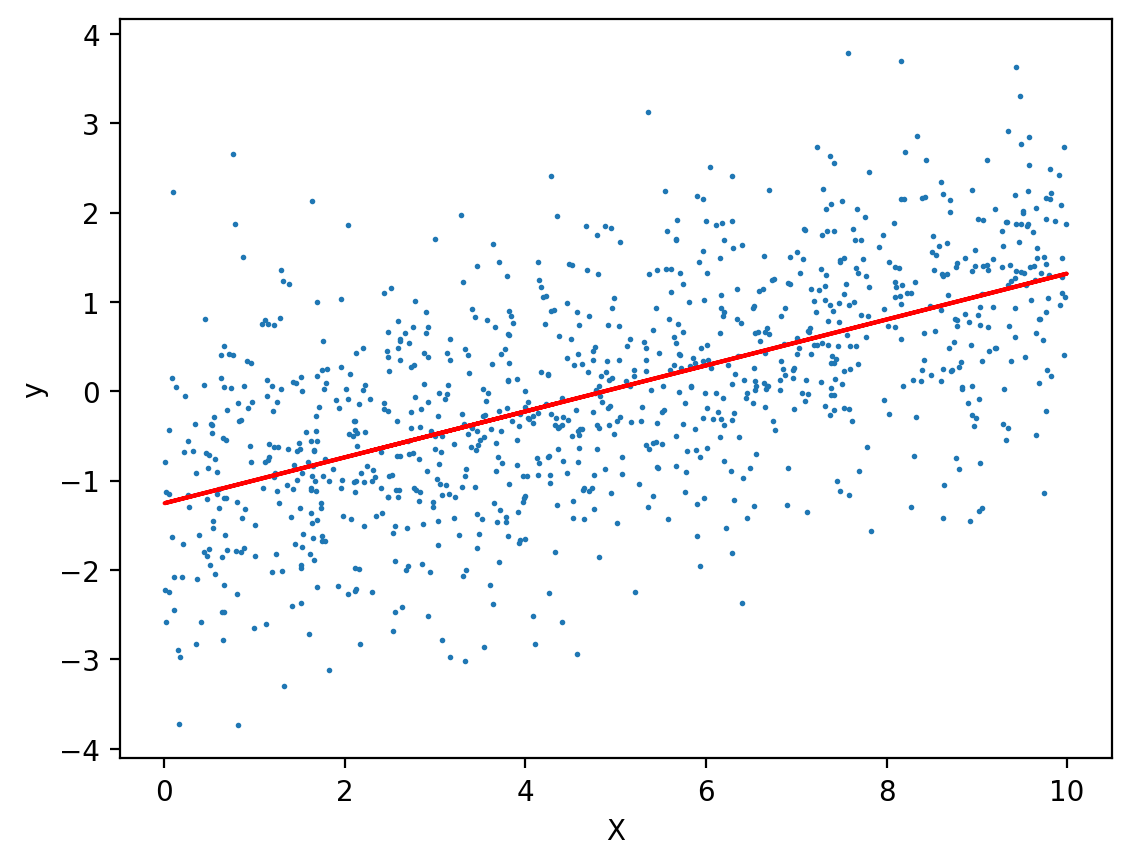

In [ ]:
plt.scatter(X,y,s=1)

plt.plot(X,y_pred,'r')

plt.xlabel('X')

plt.ylabel('y')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split \
                                    (df['EDUCATION'] \

                                    .values.reshape(-1,1), \

                                    df['default payment next month']\

                                    .values, test_size=0.2,\

                                    random_state=24) #  random number seed. Using this parameter allows a consistent train/test split across runs of this notebook.

In [ ]:
# How to do a basic sanity check of the training vs. the test data split?
# 1. eyeball the count of elements in the resulting datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [ ]:
# 2. check the ratio of the positive class (the elements having value "1") in the 80 vs. 20 side of the splits
np.mean(y_train)

0.223102526838873

In [ ]:
np.mean(y_test)

0.21657603600225014

In [ ]:
# The ratio of 1's is ~22% on both sets. That is good.
# if the dataset were smaller, and the positive class very rare, it may be that the class fractions would be noticeably different between the training and test sets, or worse yet, there might be no positive samples at all in the test set. 
# In order to guard against such scenarios, you could use stratified sampling, with the stratify keyword argument of train_test_split. 

In [ ]:
example_lr = LogisticRegression(C=0.1,
                                class_weight=None,
                                dual=False,
                                fit_intercept=True,
                                intercept_scaling=1,
                                max_iter=100,
                                multi_class='auto',
                                n_jobs=None,
                                penalty='l2',
                                random_state=None,
                                solver='liblinear',
                                tol=0.0001,
                                verbose=0,
                                warm_start=False)

In [ ]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
y_pred = example_lr.predict(X_test)

In [ ]:
# CALCULATING PREDICTION ACCURACY
# One way to calculate accuracy is to create a logical mask that is True whenever the predicted label is equal to the actual label, and False otherwise.
# We can then take the average of this mask, which will interpret True as 1 and False as 0, giving us the proportion of correct classifications:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [ ]:
# alternate way to calculate the same metric is via the SCORE method:
example_lr.score(X_test, y_test)

0.7834239639977498

In [ ]:
import spacy

spacy.__version__

'3.7.5'

In [ ]:
# Install the trained model
sudo python3 –m download en-core-web-sm
# You can now load the package via spacy.load('en_core_web_sm')

In [ ]:
nlp = spacy.load('en_core_web_sm') #Loads the spacy en model into a python object 
# doc = nlp(u'I am learning how to build chatbots')
doc = nlp(u'I am going to London next week for a meeting.')
for token in doc: #Creates a doc object for token in doc:
    print(token.text, token.pos_) #prints the text and POS
 


I PRON
am AUX
going VERB
to ADP
London PROPN
next ADJ
week NOUN
for ADP
a DET
meeting NOUN
. PUNCT


In [ ]:
candles = [4,4,1,3]



In [53]:

def grade_generator(grades):
    assert 1 <= len(grades) <= 60
    output_array = array.array('i')
    for ae in grades[1:]:
        assert 0 <= ae <= 100
        if ae >= 38:
            next_mul_five = ae + (5 - ae%5 )
            if next_mul_five - ae < 3:
                ae = next_mul_five
        # output_array.append( ae )
        print(ae)
    return input().strip()

grade_generator( a )

75
67
40
33


'ale'